In [1]:
# David Omrai
# 10.2.2023
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from sources.tsplot import tsplot
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

In [2]:
# loading the data
df = pd.read_csv("demo_r_mwk_ts_linear.csv")
df = df.drop(['DATAFLOW', 'LAST UPDATE'], axis=1)

In [3]:
df_male = df[(df['geo'] == "CZ") & (df['sex'] == "M")]
df_female = df[(df['geo'] == "CZ") & (df['sex'] == "F")]
df_total = df[(df['geo'] == "CZ") & (df['sex'] == "T")]

- v nasledujici casti upravim data ve sloupcich na prislusny typ

In [4]:
df_male['OBS_VALUE'] = df_male['OBS_VALUE'].astype(float)
df_female['OBS_VALUE'] = df_female['OBS_VALUE'].astype(float)
df_total['OBS_VALUE'] = df_total['OBS_VALUE'].astype(float)

/tmp/ipykernel_2573/665622573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_male['OBS_VALUE'] = df_male['OBS_VALUE'].astype(float)
/tmp/ipykernel_2573/665622573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female['OBS_VALUE'] = df_female['OBS_VALUE'].astype(float)
/tmp/ipykernel_2573/665622573.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [5]:
df_male['year'] = df_male.TIME_PERIOD.str[:4]
df_female['year'] = df_female.TIME_PERIOD.str[:4]
df_total['year'] = df_total.TIME_PERIOD.str[:4]

/tmp/ipykernel_2573/1037256912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_male['year'] = df_male.TIME_PERIOD.str[:4]
/tmp/ipykernel_2573/1037256912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female['year'] = df_female.TIME_PERIOD.str[:4]
/tmp/ipykernel_2573/1037256912.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [6]:
df_male['year'] = df_male['year'].astype(int)
df_female['year'] = df_female['year'].astype(int)
df_total['year'] = df_total['year'].astype(int)

/tmp/ipykernel_2573/1718360105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_male['year'] = df_male['year'].astype(int)
/tmp/ipykernel_2573/1718360105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female['year'] = df_female['year'].astype(int)
/tmp/ipykernel_2573/1718360105.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

### Prvotni analyza casovych rad

- prvotni vykresleni a zpracovani casove rady pro muze

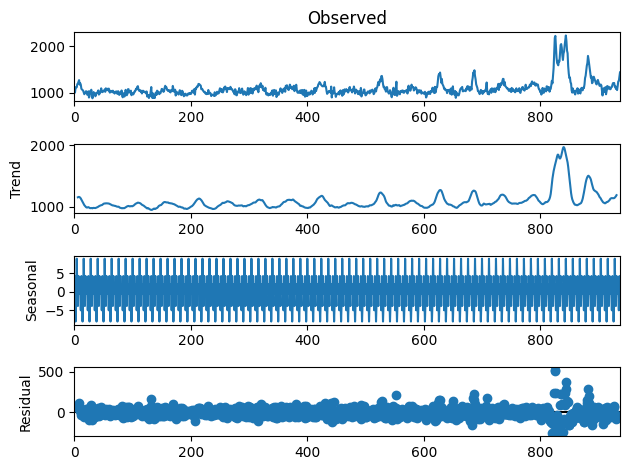

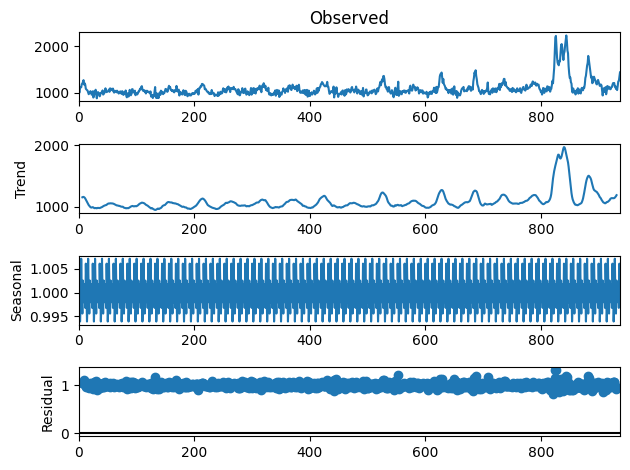

In [7]:
series = df_male['OBS_VALUE']

results_m = seasonal_decompose(series.values, period=12, model='multiplicative')
results_a = seasonal_decompose(series.values, period=12, model='adictive')

results_a.plot()
results_m.plot()

plt.show()

- V predchozi casti jsem provedl uvodni pruzkum casove rady
- Na tomto a dalsim pruzkumu chci zjistit, zdali ma smysl pro tuto praci zpracovavat umrti muzu a zen oddelene nebo zvlast
- Z prvniho pohledu na casovou radu lze pozorovat, ze se objevuje ucita sezonost, a mirny trend
- Hodnoty se jinak pohybuji v rozmezi od tisice k dvoum tisicum se znacnym narustem ke konci rady (nejspise duvod covidu)
- Dale je videt, ze lepe data popisuje multiplikativni model, majici lepsi sezoni i rezidualni cast

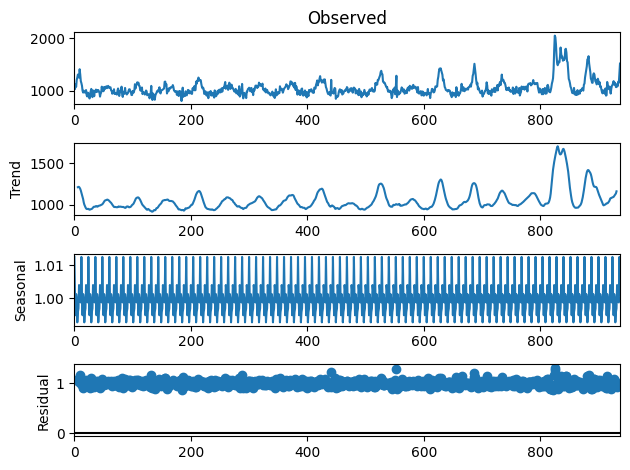

In [8]:
series = df_female['OBS_VALUE']

results_m = seasonal_decompose(series.values, period=12, model='multiplicative')

results_m.plot()

plt.show()

- Na predchozim grafu pozoruji casovou radu pro umrti zen
- Lehce se lisi od muzu, avsak ne o moc, taktez jej lepe vysvetluje multiplikativni model

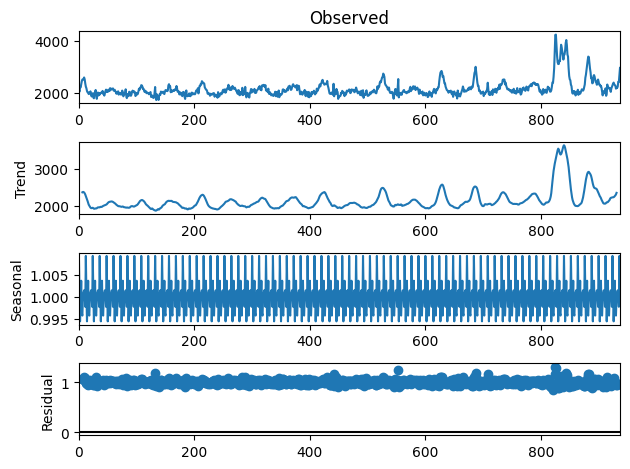

In [9]:
series = df_total['OBS_VALUE']

results_m = seasonal_decompose(series.values, period=12, model='multiplicative')

results_m.plot()

plt.show()

- Z prozkoumani predchozich grafu si k dalsi praci vyberu df_total, tedy soucet umrti muzu i zen
- Multiplikativni model opet dosahl lepsich vysledku u residui, ktere jsou centrovany kolem jednicky
- Problemem je promenna *variance v case*, predevsim ke konci casove rady, to se pokusim resit napriklad transformacemi

### Zpracovani casove rady

- Pro hlubsi analyzu casove rady df_total vyuziji Box-Jenkinsonovuv pristup
- Z prvotni analyzu bylo videt, ze se v ni nachazi urcita sezonost problem s varianci v case


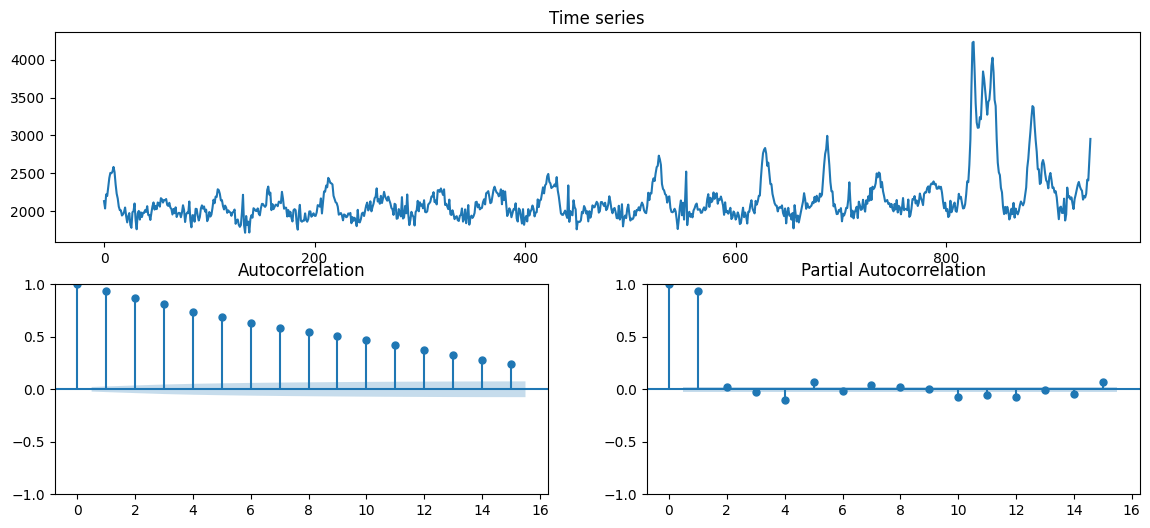

In [10]:
tsplot(df_total['OBS_VALUE'].values)

In [11]:
df_total.head()

,freq,sex,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,year
77442,W,T,NR,CZ,2005-W01,2130.0,NaN,2005
77443,W,T,NR,CZ,2005-W02,2033.0,NaN,2005
77444,W,T,NR,CZ,2005-W03,2219.0,NaN,2005
77445,W,T,NR,CZ,2005-W04,2198.0,NaN,2005
77446,W,T,NR,CZ,2005-W05,2323.0,NaN,2005


- Opet vykresluji jak casova rada vypada
- Z prvniho zpozdeni na PACF lze pozorovat, ze je tato hodnota velmi blizka 1.0, coz indikuje, ze se v casove rade nejspise nachazi nahodna prochazka, kterou je treba vyresit
- Nahodna prochazka lze vyresit pomoci diferencovani casove rady, odecteni Xt od Xt-1, timto odstranim z casove rady trend
- Pred dalsim zpracovavanim casove rady je dulezite si rici, zdali se v ni, nenachazi vice nez jeden model.
- Z pruzkumu predchoziho grafu si nemyslim, ze se v ni nachazi vice nez jeden model
- Data o umrti jsou sbirana od roku 2005, coz je pro moznou predikci nasledujicich hodnot docela velike rozmezi
- Pro casovou radu si tedy vyberu poslednich x let, kde dochazi ke znacnemu narustu umrti


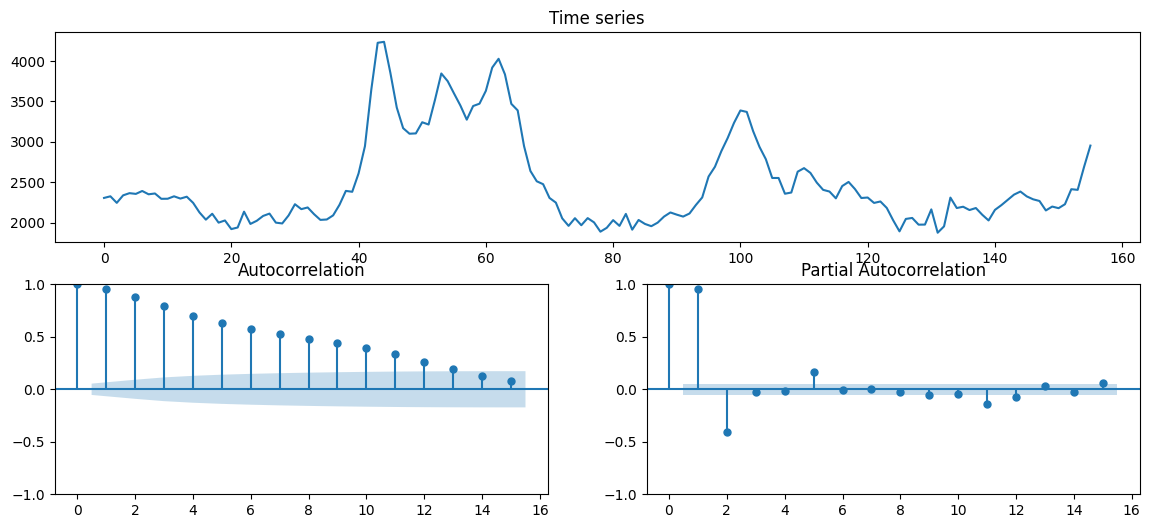

In [12]:
tsplot(df_total[df_total.year >= 2020]['OBS_VALUE'].values)

- Pro sve data jsem si vybral ta, ktera udavaji pocet umrti od roku 2020 do soucasnosti, tedy zahrnuji zacatek pandemie Covid
- Tato casova rada je tedy vice vypovidajici o soucasnosti
- Opet lze pozorovat, ze prvni zpozdeni PACF grafu je velmi blizke 1, coz vypovida o tom, ze by se v casove rade mohla nachazet nahodna prochazka a tedy by bylo vhodne se ji zbavit, tedy diferencovanim
- Zatim neberu v potaz transformaci, ktera prijde az zahy

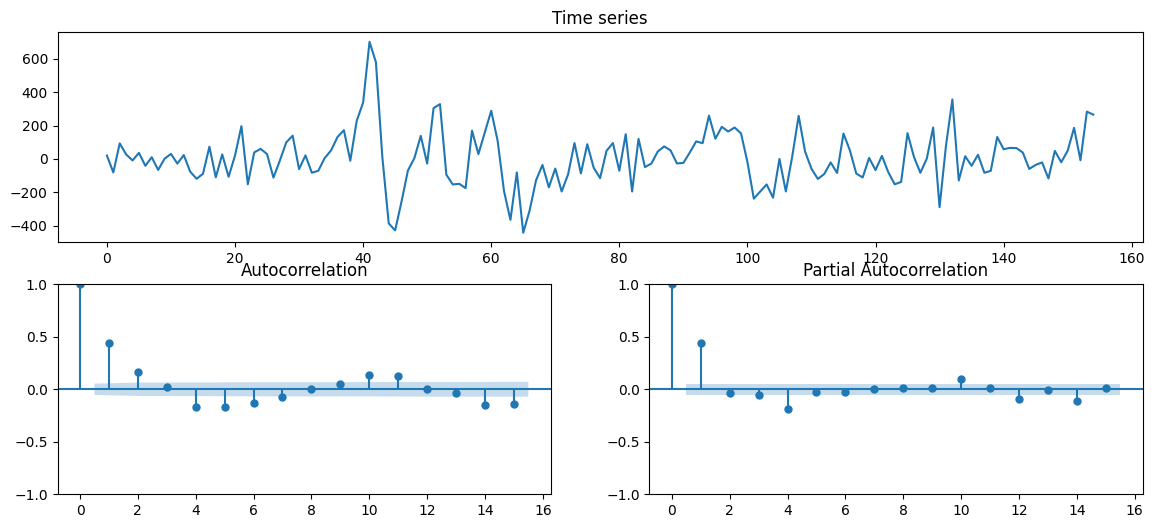

In [13]:
# New time serie
df = df_total[df_total.year >= 2020]

dff = df.OBS_VALUE.values
data_d1 = dff[1:] - dff[:-1]
tsplot(data_d1)

- Po prvni diferenci casove rady vidime, ze jsme ziskali radu novou, ve ktere se znacne meni variance (bude treba transformace)

- Pred transformaci vsak vyzkousim nafitovat model, abych jej mohl nasledne s tim ktery transformuji porovnat
- Hledani vhodnych ARIMA modelu lze hrubou silou, zkousenim vsech moznych kombinaci hodnot parametru

In [14]:
from statsmodels.tsa.stattools import arma_order_select_ic

arma_order_select_ic(data_d1, trend='n', ic='bic', max_ar=4)

/home/dave/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/dave/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'bic':              0            1            2
 0  2019.766201  1995.343334  1997.772528
 1  1991.575676  1996.520652  2001.454483
 2  1996.508035  2000.874185  2002.335971
 3  2001.037316  2003.378516  2005.187297
 4  2000.616875  2005.561664  2010.553569,
 'bic_min_order': (1, 0)}

- Ze ziskanych dat lze pozorovat, ze bez transformace dat funkce pomoci aic kriteria doporucila AR(4) a MA(0) a pomoci bic kriteria zas AR(1) a MA(0). Jedna se znacny rozdil a hodnota autoregrese na 4 znaci nevhodnost nastaveni, tedy je nutne casovou radou jeste trochu nastavit

In [15]:
from statsmodels.tsa.arima.model import ARIMA

arma = ARIMA(data_d1, order=(1,0,0), trend='n').fit()
print(arma.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  155
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -990.744
Date:                Wed, 15 Feb 2023   AIC                           1985.489
Time:                        23:38:54   BIC                           1991.576
Sample:                             0   HQIC                          1987.961
                                - 155                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4417      0.054      8.151      0.000       0.335       0.548
sigma2      2.097e+04   1996.208     10.505      0.000    1.71e+04    2.49e+04
Ljung-Box (L1) (Q):                   0.03   Jarque-

- Pro parametr ar.L1 zamitneme hypotezu H0, tedy ze je rovna nule
- Dale nemohu zamitnout, ze jsou data nekorelovana (Q)
- Pro testy heteroskedasticity nemuzeme zamitnout hypotezu H0
- Dale zamitame, ze data maji vyberovou sikmost a spicatost podobnou normalnimu rozdeleni (dale si vykreslim)

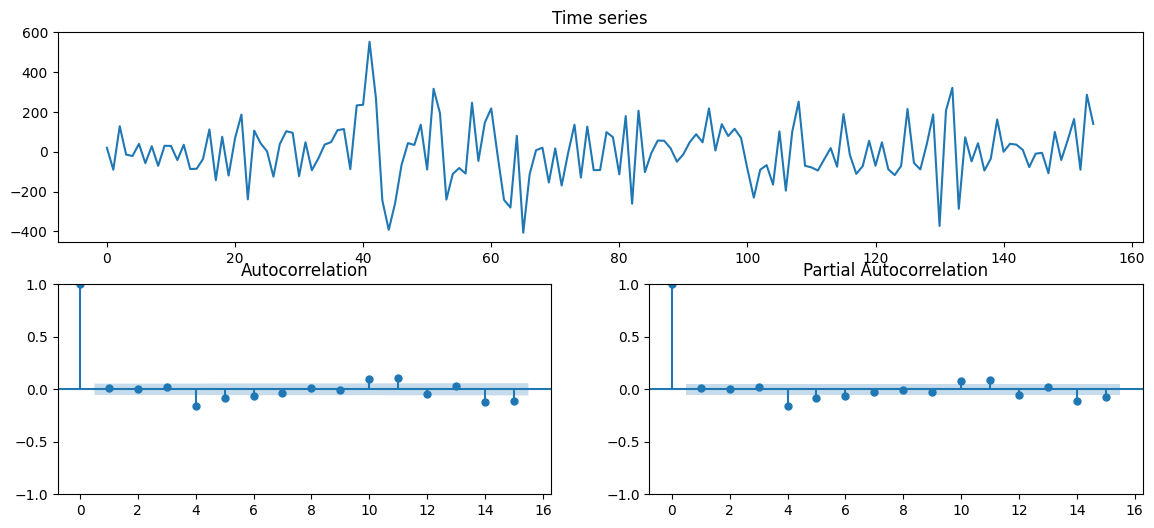

In [16]:
tsplot(arma.resid)
plt.show()

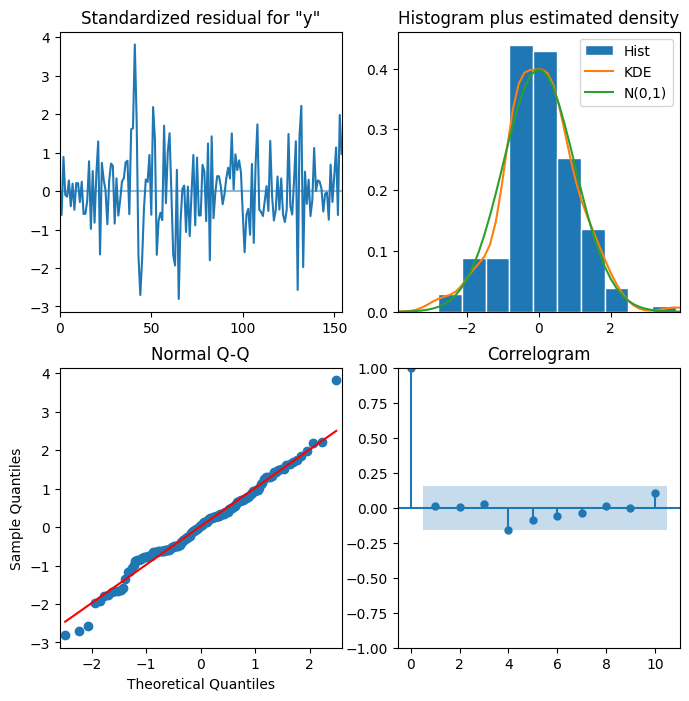

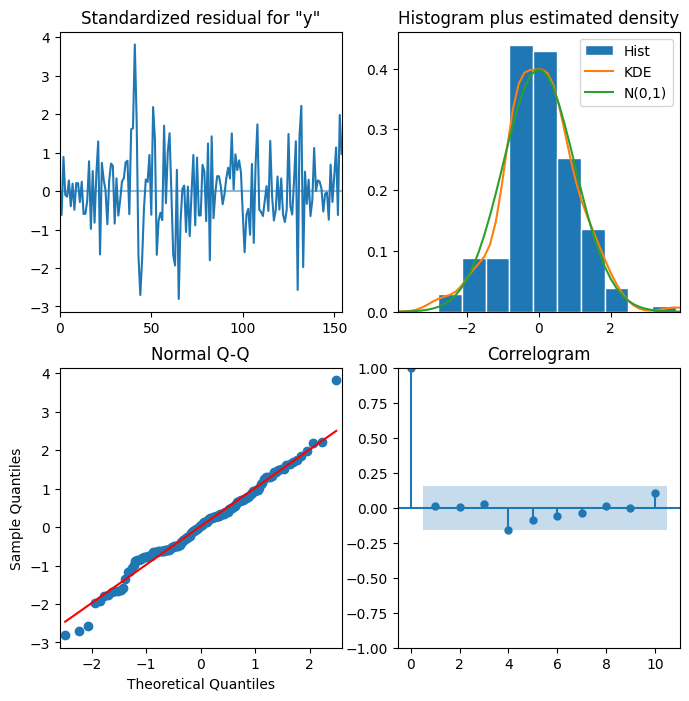

In [17]:
arma.plot_diagnostics(figsize=(8,8))

- Z grafu lze pozorovat, ze se zlepsili kvantily rezidui, histogram je centrovany k 0 a KDE je docela podobny N(0,1)
- U kvantilu rezidui je videt ze jsou dost blizke teoretickym, avsak se v nich nachazi outliners

#### Transformace dat
- Z predchozich pozorovani lze pozorovat, ze data jsou vice-mene normalne distribuovana, avsak je zde stale misto pro zlepseni
- V teto casti zkusim data transformovat pomoci BoxCox a porovnam s minulym modelem

In [18]:
obs_vals = df['OBS_VALUE'].values
fit_obs_vals, fit_obs_lambda = stats.boxcox(obs_vals)

/tmp/ipykernel_2573/1201553140.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(obs_vals, hist = False, kde = True,
/home/dave/.local/lib/python3.10/site-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/tmp/ipykernel_2573/1201553140.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) 

Lambda value used for Transformation: -2.9340009114845222


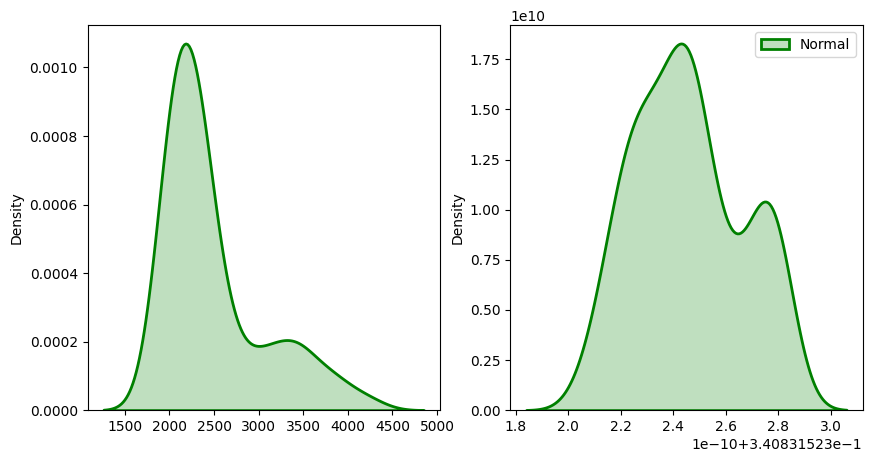

In [19]:
# kod zkopirovan z https://www.geeksforgeeks.org/box-cox-transformation-using-python/
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)

# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(obs_vals, hist = False, kde = True,
    kde_kws = {'shade': True, 'linewidth': 2},
    label = "Non-Normal", color ="green", ax = ax[0])

sns.distplot(fit_obs_vals, hist = False, kde = True,
    kde_kws = {'shade': True, 'linewidth': 2},
    label = "Normal", color ="green", ax = ax[1])

# adding legends to the subplots
plt.legend(loc = "upper right")

# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

print(f"Lambda value used for Transformation: {fit_obs_lambda}")

- Predesly kod generuje data pred transformaci a po
- Lze pozorovat, ze po transformaci se data nachazi vice kolem stredni hodnoty, kterou je cca 2.4
- Boxcox nefunguje vzdy, nergarantuje normalitu, protoze ji nekontroluje. Pouze kontroluje standartni deviaci. Po vykresleni jde tedy videt, ze transformace byla trochu zdarna

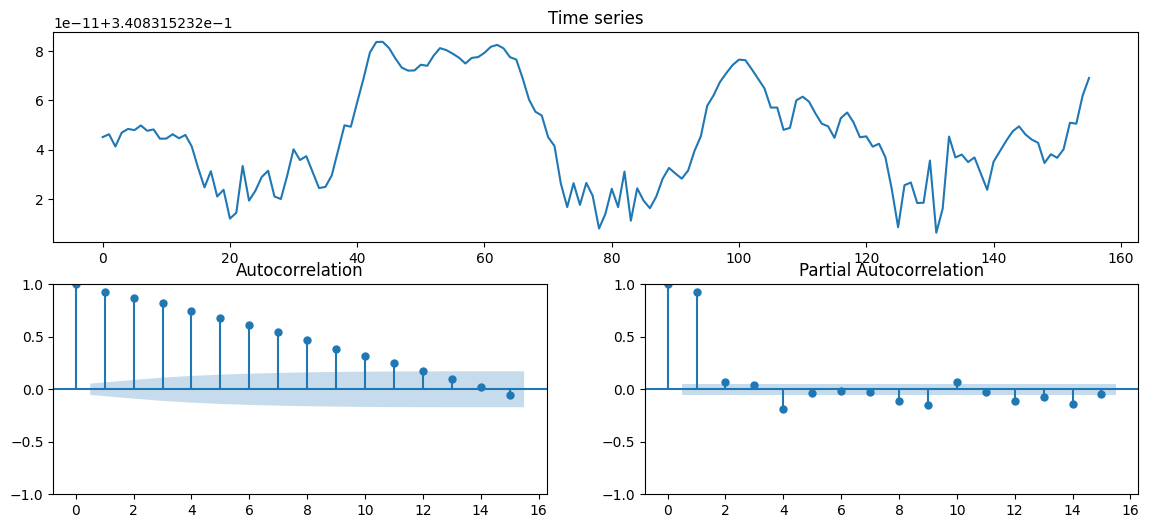

In [20]:
tsplot(fit_obs_vals)

- Po transformaci lze opet pozorovat z PACF ze se v rade nachazi nejspise nahodna prochazka, kterou je treba odstranit, o to se nyni pokusim

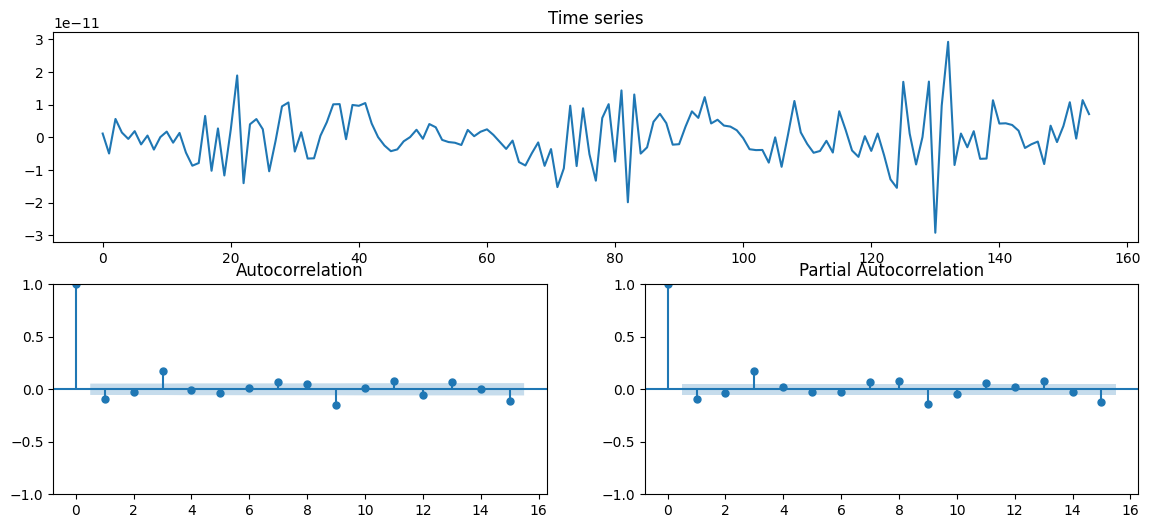

In [21]:
data_d1 = fit_obs_vals[1:] - fit_obs_vals[:-1]

tsplot(data_d1)

- Po jedne diferenci uz se z ACF ani PACF neda moc poznat, tak zkusim jaky nastaveni ARMA modelu bude doporuceno

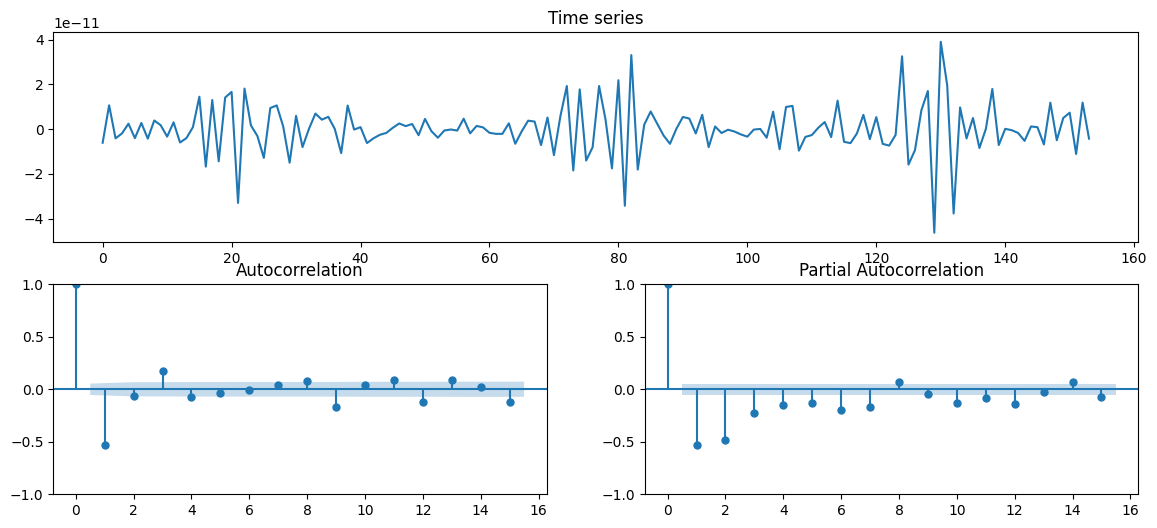

In [22]:
data_d2 = data_d1[1:] - data_d1[:-1]

tsplot(data_d2)

- Pro otestovani jeste jednoho diferencovani lze videt, ze je rada jiz prediferencovana, vyznamny lag v ACF

In [23]:
arma = ARIMA(data_d1, order=(0,0,0), trend='n').fit()
print(arma.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  155
Model:                          ARIMA   Log Likelihood                1642.068
Date:                Wed, 15 Feb 2023   AIC                          -3282.136
Time:                        23:38:58   BIC                          -3279.093
Sample:                             0   HQIC                         -3280.900
                                - 155                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2          1e-10   1.59e-10      0.628      0.530   -2.12e-10    4.12e-10
Ljung-Box (L1) (Q):                   1.23   Jarque-Bera (JB):                25.84
Prob(Q):                              0.27   Pr

/home/dave/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


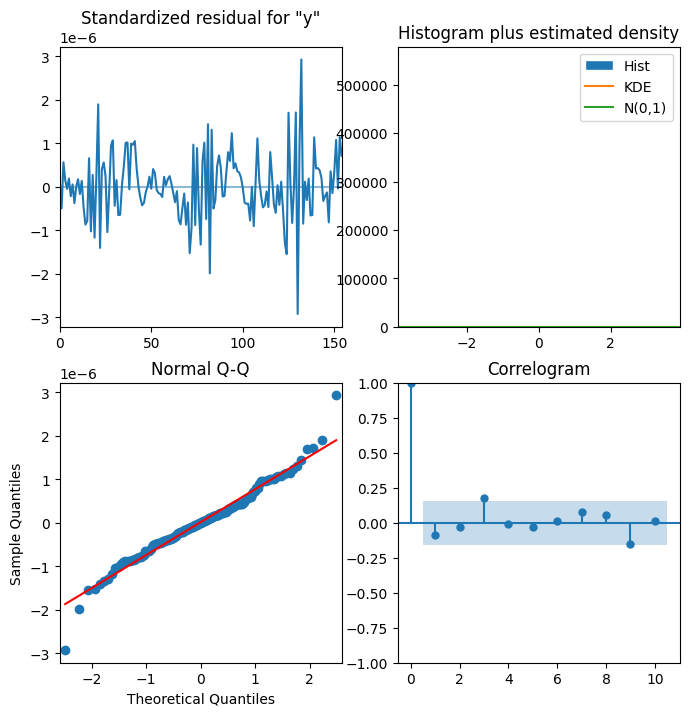

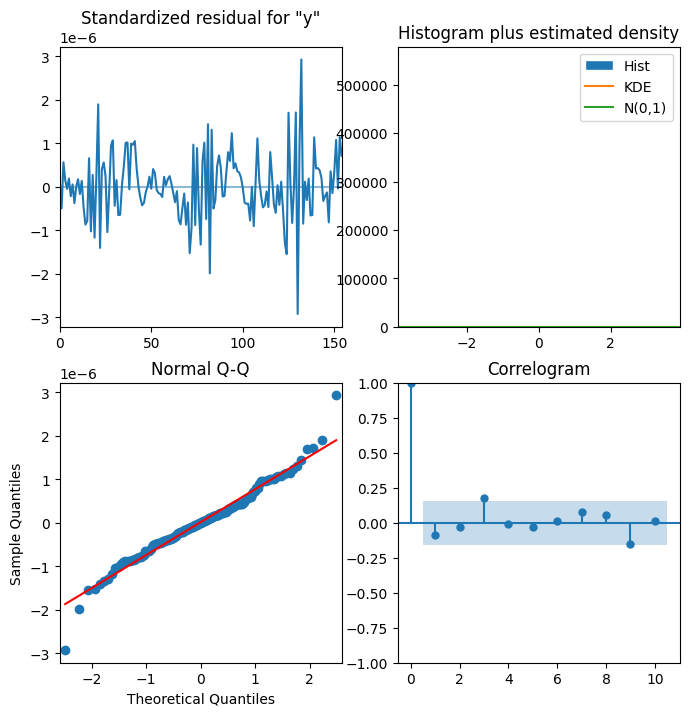

In [24]:
arma.plot_diagnostics(figsize=(8,8))

- Z predeslych grafu lze videt, ze tento pristup dopadl docela spatne, napriklad v histogramu
- Problem je, ze se v datech nachazi nejspise sezoni slozka, kterou je treba resit, a to by se dalo resit pomoci analyzi sezony, a pak pouziti napriklad SARIMA modelu
- Jelikoz jsou data brana po ctvrtleti, tak by tato sezona mohla byt 4